In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [79]:
# Load datasets
df_movies = pd.read_csv(r"C:\Users\indra\Documents\GitHub\data_mining\data\movies.csv")
df_ratings = pd.read_csv(r"C:\Users\indra\Documents\GitHub\data_mining\data\ratings.csv")

In [80]:
# Data shape and types
print("Shape:", df_movies.shape)
print("Shape:", df_ratings.shape)
df_movies.info()
df_ratings.info()

Shape: (9742, 3)
Shape: (100836, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [81]:
# Check for missing values
print("Missisng values in movies",df_movies.isnull().sum())

print("Missisng values in ratings",df_ratings.isnull().sum())

Missisng values in movies movieId    0
title      0
genres     0
dtype: int64
Missisng values in ratings userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [82]:
# Merge ratings and movie titles
df = pd.merge(df_ratings, df_movies, on='movieId', how='inner')
df.info()
print("Shape of merged data:", df.shape)
print("Missisng values in the merged data set",df.isnull().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB
Shape of merged data: (100836, 6)
Missisng values in the merged data set userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64


,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


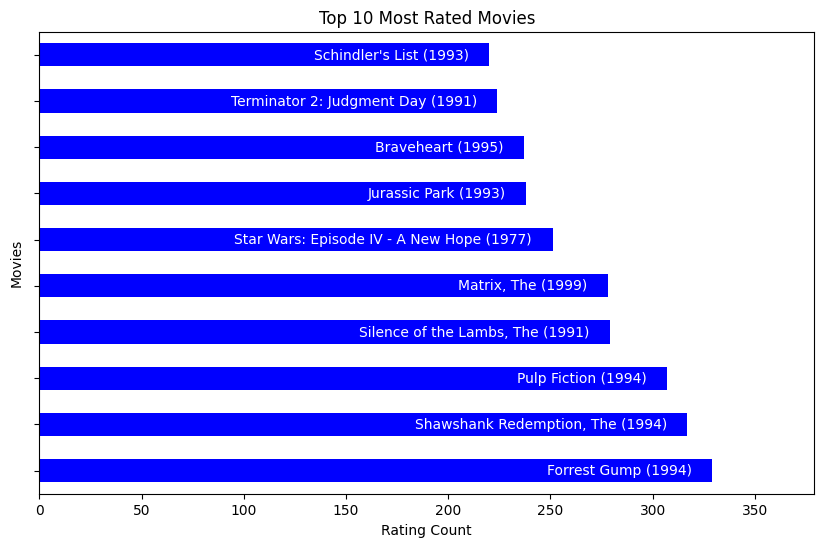

In [83]:
#Data Exploration
# Top 10 Most Rated Movies
top_movies = df['title'].value_counts().head(10)
ax=top_movies.plot(kind='barh', title='Top 10 Most Rated Movies', color='blue', figsize=(10, 6))
plt.xlabel('Rating Count')
plt.ylabel('Movies')
ax.set_xlim(0, top_movies.max() + 50)  # Adjust x-axis
ax.set_yticklabels([])
for i, (value, name) in enumerate(zip(top_movies.values, top_movies.index)):
    ax.text(value - 10, i, name, va='center', ha='right', color='white', fontsize=10)

plt.show()

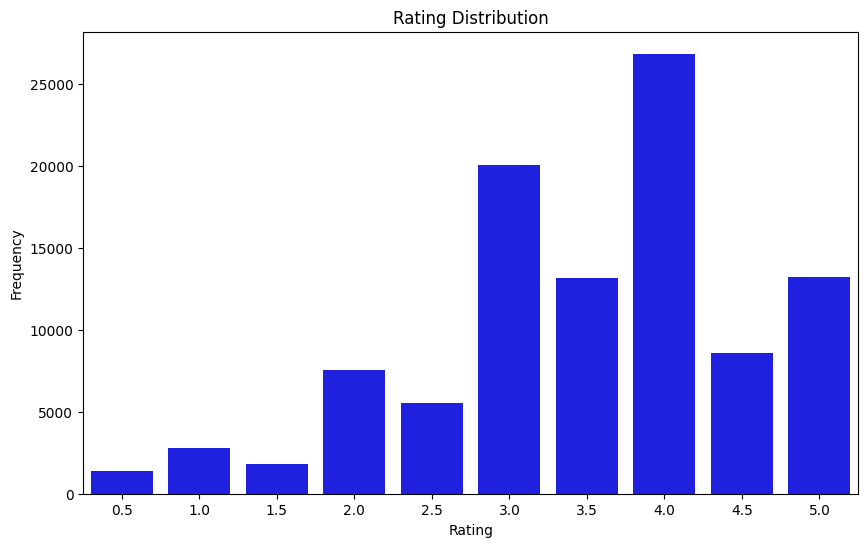

In [84]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.countplot(x="rating", data=df, color='blue')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

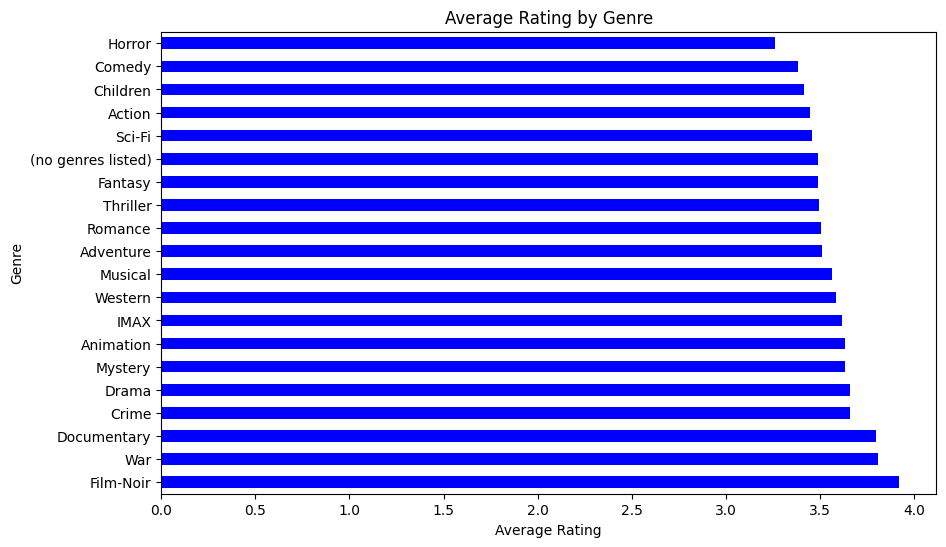

In [85]:
# Average Rating per Genre
df_genre = df.copy()
df_genre['genres'] = df_genre['genres'].str.split('|')
df_genre = df_genre.explode('genres')

genre_rating = df_genre.groupby('genres')['rating'].mean().sort_values(ascending=False)
genre_rating.plot(kind='barh', color='blue', title='Average Rating by Genre', figsize=(10, 6))
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

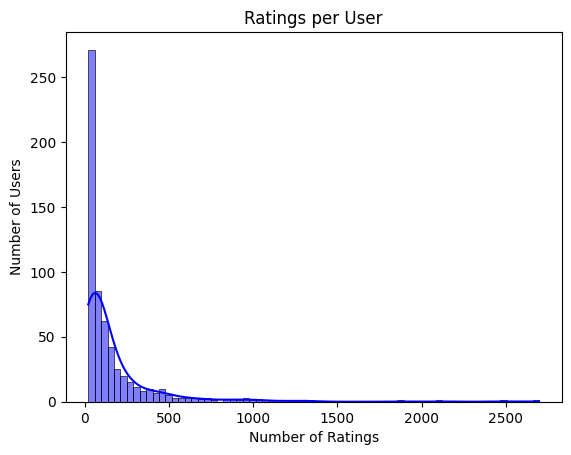

In [86]:
#User Activity Distribution
user_counts = df.groupby('userId')['rating'].count()
sns.histplot(user_counts, bins=70, kde=True, color='blue', stat='count')
plt.title("Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.show()

In [ ]:
# --- Split into Train and Test ---
# Prepare data for modelling

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [88]:
# --- Linear Regression ---
# Encoding movieId and userId for regression model
train_encoded = train_data.copy()
test_encoded = test_data.copy()

user_map = {id: idx for idx, id in enumerate(df['userId'].unique())}
movie_map = {id: idx for idx, id in enumerate(df['movieId'].unique())}

train_encoded['user'] = train_encoded['userId'].map(user_map)
train_encoded['movie'] = train_encoded['movieId'].map(movie_map)
test_encoded['user'] = test_encoded['userId'].map(user_map)
test_encoded['movie'] = test_encoded['movieId'].map(movie_map)

X_train = train_encoded[['user', 'movie']]
y_train = train_encoded['rating']
X_test = test_encoded[['user', 'movie']]
y_test = test_encoded['rating']

In [ ]:
# Train linear regression
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, preds)
print("Linear Regression MSE:", mse)

Linear Regression MSE: 1.0717035359523093


In [ ]:
# --- Content-Based Recommendation ---
# Creating TF-IDF matrix for genres

df_movies['genres'] = df_movies['genres'].astype(str)

# Convert genres to a single string for each movie
df_movies['genres'] = df_movies['genres'].apply(lambda x: ' '.join(x.split('|')) if isinstance(x, str) else '')


# Fill any missing genres
df_movies['genres'] = df_movies['genres'].fillna('')

tfidf = TfidfVectorizer(token_pattern='[a-zA-Z0-9-]+')
tfidf_matrix = tfidf.fit_transform(df_movies['genres'])

print("TF-IDF matrix shape:", tfidf_matrix)



TF-IDF matrix shape: <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 22152 stored elements and shape (9742, 22)>
  Coords	Values
  (0, 1)	0.41684567364693936
  (0, 2)	0.5162254711770092
  (0, 3)	0.5048454681396087
  (0, 4)	0.26758647689140014
  (0, 8)	0.482990142708577
  (1, 1)	0.5123612074824269
  (1, 3)	0.6205251727456431
  (1, 8)	0.5936619434123594
  (2, 4)	0.5709154064399099
  (2, 17)	0.8210088907493954
  (3, 4)	0.5050154397005037
  (3, 17)	0.726240982959826
  (3, 7)	0.46640480307738325
  (4, 4)	1.0
  (5, 0)	0.5493281743985543
  (5, 5)	0.6359470441562757
  (5, 19)	0.5420423542868653
  (6, 4)	0.5709154064399099
  (6, 17)	0.8210088907493954
  (7, 1)	0.6366993258087036
  (7, 3)	0.7711121633813997
  (8, 0)	1.0
  (9, 1)	0.6295217016667962
  (9, 0)	0.5530653284926609
  (9, 19)	0.5457299419583338
  :	:
  (9731, 1)	0.5457483258721834
  (9731, 4)	0.35033318329028923
  (9731, 0)	0.47946635727353976
  (9731, 18)	0.5912169125932073
  (9732, 2)	0.6278054979536716
  (9732, 4)	0.325

In [91]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

print("Cosine similarity matrix shape:")
print(cosine_sim)


Cosine similarity matrix shape:
[[1.         0.81357774 0.15276924 ... 0.         0.4210373  0.26758648]
 [0.81357774 1.         0.         ... 0.         0.         0.        ]
 [0.15276924 0.         1.         ... 0.         0.         0.57091541]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.4210373  0.         0.         ... 0.         1.         0.        ]
 [0.26758648 0.         0.57091541 ... 0.         0.         1.        ]]


In [102]:
# --- Content-Based Recommendation ---
def content_based_recommendations(movieId, top_n=10):
    # Check if movieId exists
    if movieId not in df_movies['movieId'].values:
        print(f"Movie ID {movieId} not found in dataset.")
        return None, None
    
    # Get the title of the input movie
    movie_title = df_movies.loc[df_movies['movieId'] == movieId, 'title'].values[0]

    # Get index of the movie
    idx = df_movies.index[df_movies['movieId'] == movieId][0]
    
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    print(f"Similarity scores for '{movie_title}':")
    for i, score in sim_scores[:top_n+1]:
        print(f"Movie ID: {df_movies.iloc[i]['movieId']}, Title: {df_movies.iloc[i]['title']}, Score: {score:.4f}")
    
    movie_indices = [i[0] for i in sim_scores[1:top_n+1]]
    
   
    return movie_title, df_movies.iloc[movie_indices][['movieId', 'title']]


movie_id = 593

title, recommendations = content_based_recommendations(movie_id)

if title and recommendations is not None:
    print(f"\nContent-Based Recommendations for '{title}':")
    print(recommendations)


Similarity scores for 'Silence of the Lambs, The (1991)':
Movie ID: 593, Title: Silence of the Lambs, The (1991), Score: 1.0000
Movie ID: 2159, Title: Henry: Portrait of a Serial Killer (1986), Score: 1.0000
Movie ID: 2389, Title: Psycho (1998), Score: 1.0000
Movie ID: 4645, Title: Cure (1997), Score: 1.0000
Movie ID: 5556, Title: FearDotCom (a.k.a. Fear.com) (a.k.a. Fear Dot Com) (2002), Score: 1.0000
Movie ID: 5569, Title: Last House on the Left, The (1972), Score: 1.0000
Movie ID: 8035, Title: Stendhal Syndrome, The (Sindrome di Stendhal, La) (1996), Score: 1.0000
Movie ID: 40723, Title: Wolf Creek (2005), Score: 1.0000
Movie ID: 48877, Title: Saw III (2006), Score: 1.0000
Movie ID: 53435, Title: Hostel: Part II (2007), Score: 1.0000
Movie ID: 55577, Title: Saw IV (2007), Score: 1.0000

Content-Based Recommendations for 'Silence of the Lambs, The (1991)':
      movieId                                              title
1615     2159          Henry: Portrait of a Serial Killer (1986)

In [99]:
# --- Collaborative Filtering (User-User) ---
user_movie_matrix = df.pivot_table(index='userId', columns='movieId', values='rating')

# Fill NaNs with 0 for similarity
user_similarity = cosine_similarity(user_movie_matrix.fillna(0))
user_sim_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)

In [100]:
# Recommend movies for a given user
def collaborative_recommendations(user_id, top_n=5):
    sim_users = user_sim_df[user_id].sort_values(ascending=False).drop(user_id).index
    user_seen_movies = user_movie_matrix.loc[user_id].dropna().index

    rec_scores = {}
    for sim_user in sim_users:
        sim_user_ratings = user_movie_matrix.loc[sim_user]
        for movie, rating in sim_user_ratings.dropna().items():
            if movie not in user_seen_movies:
                if movie not in rec_scores:
                    rec_scores[movie] = 0
                rec_scores[movie] += rating * user_sim_df[user_id][sim_user]
        if len(rec_scores) >= top_n:
            break

    recommended_movies = sorted(rec_scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
    movie_ids = [movie_id for movie_id, score in recommended_movies]
    return df_movies[df_movies['movieId'].isin(movie_ids)][['movieId', 'title']]

print("\nCollaborative Recommendations for User 2:")
print(collaborative_recommendations(2))


Collaborative Recommendations for User 2:
      movieId                                              title
828      1089                              Reservoir Dogs (1992)
2226     2959                                  Fight Club (1999)
3638     4993  Lord of the Rings: The Fellowship of the Ring,...
4800     7153  Lord of the Rings: The Return of the King, The...
5166     8368    Harry Potter and the Prisoner of Azkaban (2004)
